In [2]:
import pandas as pd
import parse_rankings

In [16]:
m_100_df = parse_rankings.parse_with_wind('m_100.txt')
w_100_df = parse_rankings.parse_with_wind('w_100.txt')
m_200_df = parse_rankings.parse_with_wind('m_200.txt')
w_200_df = parse_rankings.parse_with_wind('w_200.txt')
m_110H_df = parse_rankings.parse_with_wind('m_110H.txt')
w_100H_df = parse_rankings.parse_with_wind('w_100H.txt')


In [21]:
m_400_df = parse_rankings.parse_no_wind('m_400.txt')
w_400_df = parse_rankings.parse_no_wind('w_400.txt')
m_400H_df = parse_rankings.parse_no_wind('m_400H.txt')
w_400H_df = parse_rankings.parse_no_wind('w_400H.txt')
m_800_df = parse_rankings.parse_no_wind('m_800.txt')
w_800_df = parse_rankings.parse_no_wind('w_800.txt')
m_1500_df = parse_rankings.parse_no_wind('m_1500.txt')
w_1500_df = parse_rankings.parse_no_wind('w_1500.txt')
m_3000SC_df = parse_rankings.parse_no_wind('m_3000SC.txt')
w_3000SC_df = parse_rankings.parse_no_wind('w_3000SC.txt')
m_5000_df = parse_rankings.parse_no_wind('m_5000.txt')
w_5000_df = parse_rankings.parse_no_wind('w_5000.txt')
m_10000_df = parse_rankings.parse_no_wind('m_10000.txt')
w_10000_df = parse_rankings.parse_no_wind('w_10000.txt')


In [22]:
event_dict = {
    'm_100': m_100_df,
    'w_100': w_100_df,
    'm_110H': m_110H_df,
    'w_100H': w_100H_df,
    'm_200': m_200_df,
    'w_200': w_200_df,
    'm_400': m_400_df,
    'w_400': w_400_df,
    'm_400H': m_400H_df,
    'w_400H': w_400H_df,
    'm_800': m_800_df,
    'w_800': w_800_df,
    'm_1500': m_1500_df,
    'w_1500': w_1500_df,
    'm_3000SC': m_3000SC_df,
    'w_3000SC': w_3000SC_df,
    'm_5000': m_5000_df,
    'w_5000': w_5000_df,
    'm_10000': m_10000_df,
    'w_10000': w_10000_df,
}

In [25]:
# Function to rerank times
def rerank_times(df):
    df['rerank'] = df['time_in_secs'].rank(method='min', ascending=True)
    return df

In [28]:
columns = ['event', 'year', 'n_top_performances', 'n_top_athletes']
results_df = pd.DataFrame(columns=columns)

for event_name, event_df in event_dict.items():
# Iterate through each year from 2024 to 2000
    for year in range(2024, 1999, -1):
        # Remove rows with "future" years
        filtered_df = event_df[event_df['race_year'] <= year].copy()
        
        # Rerank times
        filtered_df = rerank_times(filtered_df)

        # Filter to only top 25 in the rerank column
        filtered_df_2 = filtered_df[(filtered_df['rerank']<=25) & (filtered_df['race_year']==year)].copy()

        # Count number of performances and number of athletes in top 25
        n_athletes = len(filtered_df_2['athlete_name'].unique())
        n_performances = filtered_df_2.shape[0]

        # New rows as dictionaries
        new_row = [
            {'event': event_name, 'year': year, 'n_top_performances': n_performances, 'n_top_athletes': n_athletes}
        ]

        # Adding rows using pd.concat
        df_new_row = pd.DataFrame(new_row)
        results_df = pd.concat([results_df, df_new_row], ignore_index=True)

In [29]:
results_df.to_csv('results.csv')

In [26]:
df[df['race_year']==2024]

,rank,time,athlete_name,race_date,race_year
34,22,9.77,Kishane Thompson,2024-06-28,2024
49,41,9.79A,Ferdinand Omanyala,2024-06-15,2024
64,60,9.81,Noah Lyles,2024-07-20,2024
78,66,9.82,Oblique Seville,2024-06-01,2024
79,66,9.82,Kishane Thompson,2024-06-27,2024
...,...,...,...,...,...
4391,3949,10.09,Lance Lang,2024-06-22,2024
4392,3949,10.09,Dominik Kopec,2024-06-22,2024
4393,3949,10.09,Jehlani Gordon,2024-06-27,2024
4394,3949,10.09,Ojie Edoburun,2024-07-14,2024


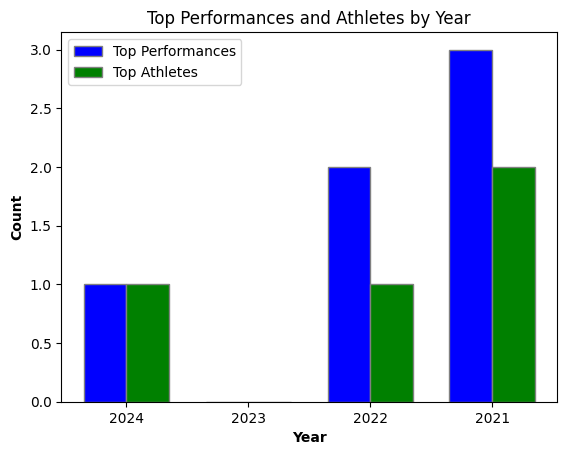

In [43]:
import matplotlib.pyplot as plt

# Plotting the bar chart
fig, ax = plt.subplots()

# Width of bars
bar_width = 0.35

# Set positions of bar on X axis
r1 = range(len(results_df['year']))
r2 = [x + bar_width for x in r1]

# Create bars
bars1 = ax.bar(r1, results_df['n_top_performances'], color='b', width=bar_width, edgecolor='grey', label='Top Performances')
bars2 = ax.bar(r2, results_df['n_top_athletes'], color='g', width=bar_width, edgecolor='grey', label='Top Athletes')

# Add labels
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.set_title('Top Performances and Athletes by Year')
ax.set_xticks([r + bar_width / 2 for r in range(len(results_df['year']))])
ax.set_xticklabels(results_df['year'])

# Create legend
ax.legend()

# Show the plot
plt.show()


In [4]:
# url = 'https://www.alltime-athletics.com/m_100ok.htm'
# response = requests.get(url)
html_content = m_100.html

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')
pre_tag = soup.find('pre')

# Extract the text from the <pre> tag
text = pre_tag.get_text()

# Split the text by lines
lines = text.strip().split('\n')

# Split each line by spaces and create a DataFrame
data = [line.split() for line in lines]

# Define column names
columns = ['rank', 'time', 'wind', 'athlete_name', 'athlete_country', 'athlete_dob', 'race_place', 'race_location', 'race_date']

# Create a DataFrame
df = pd.DataFrame(data, columns=columns)

# Combine first name and last name into athlete_name
df['athlete_name'] = df['athlete_name'] + ' ' + df.pop('athlete_country')

# Select relevant columns
df = df[['rank', 'time', 'athlete_name', 'race_date']]

# Convert race_date to datetime and extract the year
df['race_date'] = pd.to_datetime(df['race_date'], format='%d.%m.%Y')
df['race_year'] = df['race_date'].dt.year

print(df)


ValueError: 9 columns passed, passed data had 16 columns